In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
%matplotlib inline


In [4]:
df=pd.read_csv('height-weight.csv')

In [5]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [6]:
df.tail()

,Weight,Height
18,76,150
19,87,167
20,45,129
21,56,140
22,72,160


Text(0, 0.5, 'height')

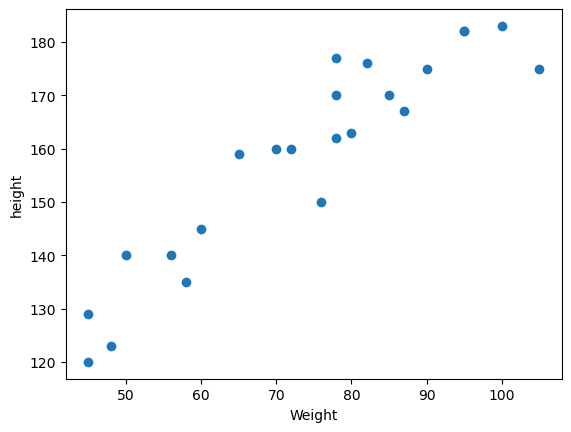

In [7]:
### Scatter Plot 
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("Weight")
plt.ylabel("height")

In [8]:
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


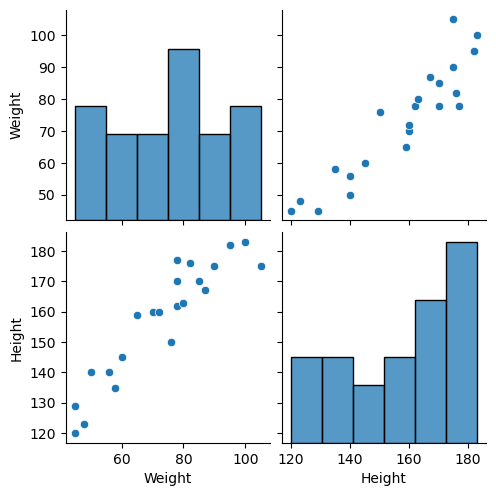

In [9]:
## Seaborn
import seaborn as sns
sns.pairplot(df)

In [10]:
## Independent and Dependent features 
X=df[['Weight']]   ## independent has to be dataframe or 2d
y=df[['Height']]

In [11]:
type(X)
np.array(X).shape

(23, 1)

In [12]:
y

,Height
0,120
1,135
2,123
3,145
4,160
5,162
6,163
7,175
8,182
9,170


In [16]:
## Train Test Split 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [17]:
X_train.shape

(17, 1)

In [18]:
## Standaization
from sklearn.preprocessing import StandardScaler

In [19]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)

In [20]:
X_test=scaler.transform(X_test)

In [21]:
X_test

array([[ 0.33497168],
       [ 0.33497168],
       [-1.6641678 ],
       [ 1.36483141],
       [-0.45256812],
       [ 1.97063125]])

In [22]:
## Apply Simple Linear Regression
from sklearn.linear_model import LinearRegression

In [23]:
regression=LinearRegression(n_jobs=-1)

In [24]:
regression.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [26]:
print("Coefficient or slope:",regression.coef_)
print("Intercept:",regression.intercept_)


Coefficient or slope: [[17.2982057]]
Intercept: [156.47058824]


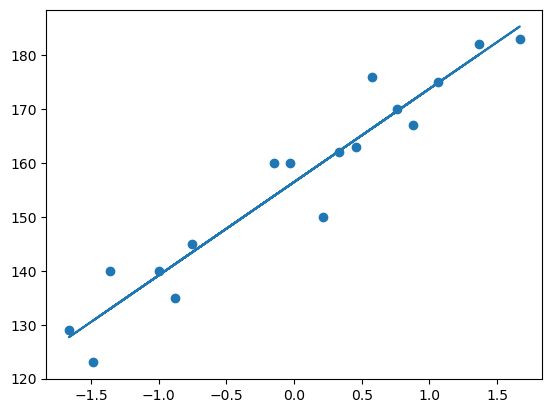

In [27]:
##plot training data plot best fit line
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train))

### prediction of test data
1. predicted height output= intercept +coef_(Weights)
2. y_pred_test =156.470 + 17.29(X_test)

In [29]:
## Prediction for test data
y_pred=regression.predict(X_test)

In [32]:
## Performance Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [33]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

114.84069295228699
9.665125886795005
10.716374991212605


## R square 
Formula

**R^2 = 1 - SSR/SST**


R^2	=	coefficient of determination
SSR	=	sum of squares of residuals
SST	=	total sum of squares

In [35]:
from sklearn.metrics import r2_score

In [36]:
score=r2_score(y_test,y_pred)
print(score)

0.7360826717981276


**Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]**

where:

R2: The R2 of the model
n: The number of observations
k: The number of predictor variables

In [37]:
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.6701033397476595

In [38]:
## OLS Linear Regression
import statsmodels.api as sm

In [39]:
model=sm.OLS(y_train,X_train).fit()

In [40]:
prediction=model.predict(X_test)
print(prediction)

[  5.79440897   5.79440897 -28.78711691  23.60913442  -7.82861638
  34.08838469]


In [41]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Tue, 05 Aug 2025   Prob (F-statistic):                       0.664
Time:                        18:25:56   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

o:\anaconda storage\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  res = hypotest_fun_out(*samples, **kwds)


In [44]:
## Prediction For new data

regression.predict(scaler.transform([[72]]))

o:\anaconda storage\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[155.97744705]])